<a href="https://colab.research.google.com/github/hkaragah/risk_reliability/blob/main/Kolmogorov_Smirnov_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Use Scipy Package

### Example #1

Use _one-sample_ KS-test<br>
Given:
* Randomly samples data listed in `data`
* Hypothesized distribution: _normal_ with $\mu=0$ and $\sigma=1$
* 5% significance level

In [1]:
import numpy as np
from scipy import stats

# One-Sample K-S Test
data = np.random.normal(loc=0, scale=1, size=100)  # Sample data
statistic, p_value = stats.kstest(data, 'norm')

print(f"One-Sample K-S Test Statistic: {statistic}")
print(f"P-Value: {p_value}")

One-Sample K-S Test Statistic: 0.12393572461412722
P-Value: 0.08496231248914762


Accept the null hypothesis: the given sample is from the assumed normal distribution.

### Example #2
Use _two-sample_ KS-test<br>
Given:
* Two randomly samples data set from normal distribution
* Null hypothesis: The two samples are from the same distribution
* 5% significance level

In [2]:
# Two-Sample K-S Test
data1 = np.random.normal(loc=0, scale=1, size=100)  # First sample
data2 = np.random.normal(loc=0, scale=1, size=100)  # Second sample
statistic, p_value = stats.ks_2samp(data1, data2)

print(f"Two-Sample K-S Test Statistic: {statistic}")
print(f"P-Value: {p_value}")

Two-Sample K-S Test Statistic: 0.08
P-Value: 0.9084105017744525


Accept the null hypothesis: the two samples are from the same distribution.

### Example #3
Given (see ref. #4):
* Failure times of a device listed in `data`
* Hypothesized distribution: _exponential_ with $\lambda = 5 \times 10^{-4}$
* 5% Sigificance

In [3]:
data = np.array([254, 586, 809, 862, 1381, 1923, 2542, 4211])
stats.kstest(data, lambda x: stats.expon.cdf(x, scale=5e-4))

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=254, statistic_sign=-1)

the result seems wrong!!!

# Use Reliability Package

### Install Reliability Package
Un-comment and run the following cell if the package is not already installed.

In [ ]:
# !pip install reliability

### Example #1
Given (see ref. #2 and #4):
* Accumulated mileage of a 100-passenger van after 2 years in service: `data`
* Hypothesized distribution: _normal_ with $\mu=30011$ and $\sigma=10472$
* 5% significance level

Results from Kolmogorov-Smirnov test:
Kolmogorov-Smirnov statistic: 0.07162465859560846
Kolmogorov-Smirnov critical value: 0.13402791648569568
At the 0.05 significance level, we can ACCEPT the hypothesis that the data comes from a normal distribution (μ=30011,σ=10472)


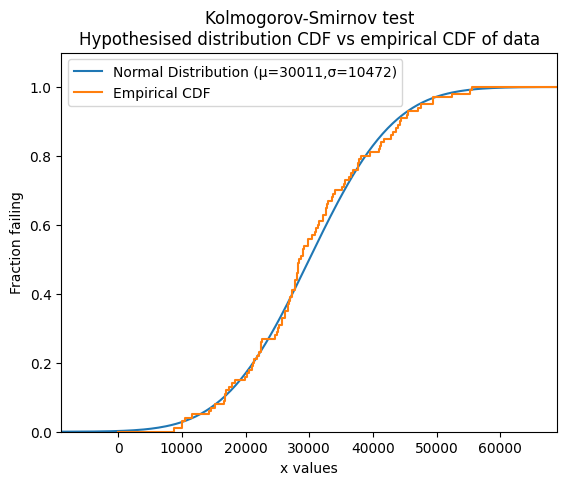

In [5]:
from reliability.Datasets import mileage
from reliability.Distributions import Normal_Distribution
from reliability.Reliability_testing import KStest
import matplotlib.pyplot as plt

data = mileage().failures
dist = Normal_Distribution(mu=30011, sigma=10472)
KStest(distribution=dist, data=data)
plt.show()

### Example #2
Given (see ref. #4):
* Failure times of a device listed in `data`
* Hypothesized distribution: _exponential_ with $\lambda = 5 \times 10^{-4}$
* 5% Sigificance

Results from Kolmogorov-Smirnov test:
Kolmogorov-Smirnov statistic: 0.15555093052561875
Kolmogorov-Smirnov critical value: 0.4542665910847761
At the 0.05 significance level, we can ACCEPT the hypothesis that the data comes from a exponential distribution (λ=0.0005)


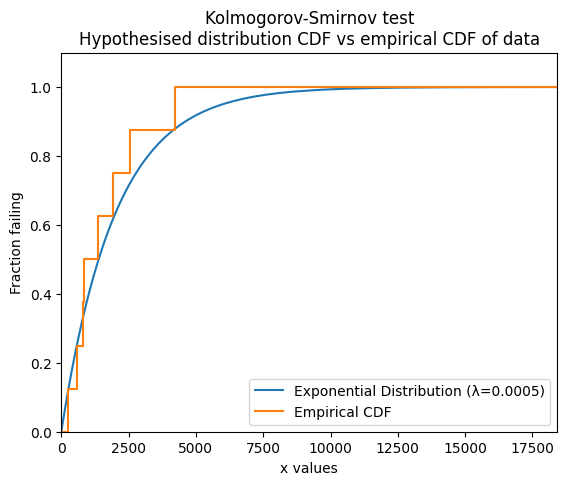

In [8]:
from reliability.Distributions import Exponential_Distribution

data = [254, 586, 809, 862, 1381, 1923, 2542, 4211]

dist = Exponential_Distribution(Lambda=5e-4)
KStest(distribution=dist, data=data)
plt.legend(loc='lower right')
plt.show()

### Example #3
Given (see ref. #4):
* Wear out time of automobile brake pads: `data`
* Hypothesized distribution: _Weibull_ with $\alpha=18,400$ and $\beta=1.5$
* 10% and 20% significance levels

Results from Kolmogorov-Smirnov test:
Kolmogorov-Smirnov statistic: 0.18504389701517654
Kolmogorov-Smirnov critical value: 0.21756033782273881
At the 0.1 significance level, we can ACCEPT the hypothesis that the data comes from a weibull distribution (α=18400,β=1.5)
Results from Kolmogorov-Smirnov test:
Kolmogorov-Smirnov statistic: 0.18504389701517654
Kolmogorov-Smirnov critical value: 0.19028728617957905
At the 0.2 significance level, we can ACCEPT the hypothesis that the data comes from a weibull distribution (α=18400,β=1.5)


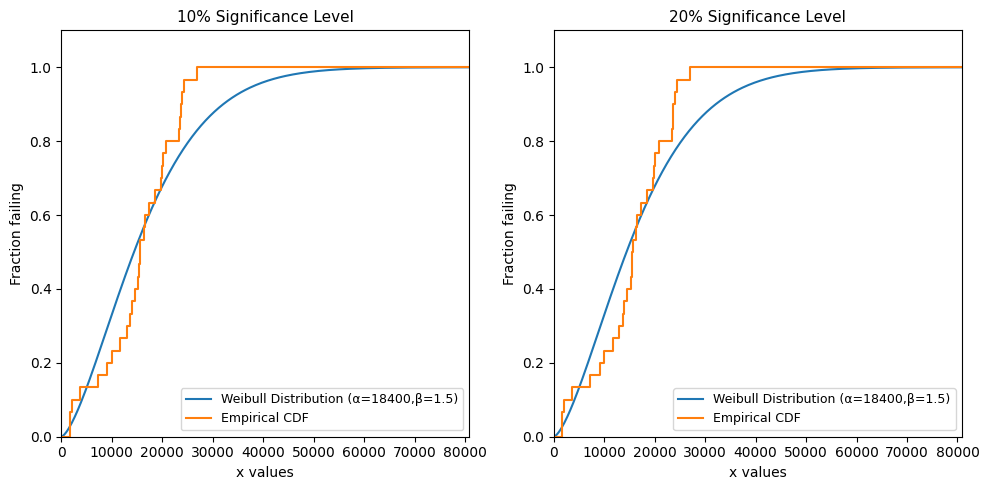

In [35]:
data = [1643,1664,2083,3625,7230,9095,9968,11689,12989,13622,13953,14527,15263,15428,15503,15629,16342,16584,17374,18571,19739,19936,20102,20832,23378,23612,23678,23971,24341,26964]

from reliability.Distributions import Weibull_Distribution
dist = Weibull_Distribution(alpha = 18_400, beta= 1.5)

plt.figure(figsize=(10, 5))

plt.subplot(121)
KStest(distribution=dist, data=data, significance=0.1)
plt.title('10% Significance Level', fontsize=11)
plt.legend(loc='lower right', fontsize=9)

plt.subplot(122)
KStest(distribution=dist, data=data, significance=0.2)
plt.title('20% Significance Level', fontsize=11)
plt.legend(loc='lower right', fontsize=9)

plt.tight_layout()
plt.show()

Results from Kolmogorov-Smirnov test:
Kolmogorov-Smirnov statistic: 0.18504389701517654
Kolmogorov-Smirnov critical value: 0.24170347059707356
At the 0.05 significance level, we can ACCEPT the hypothesis that the data comes from a weibull distribution (α=18400,β=1.5)
Results from Kolmogorov-Smirnov test:
Kolmogorov-Smirnov statistic: 0.20896106319455854
Kolmogorov-Smirnov critical value: 0.24170347059707356
At the 0.05 significance level, we can ACCEPT the hypothesis that the data comes from a normal distribution (μ=18400,σ=8500)


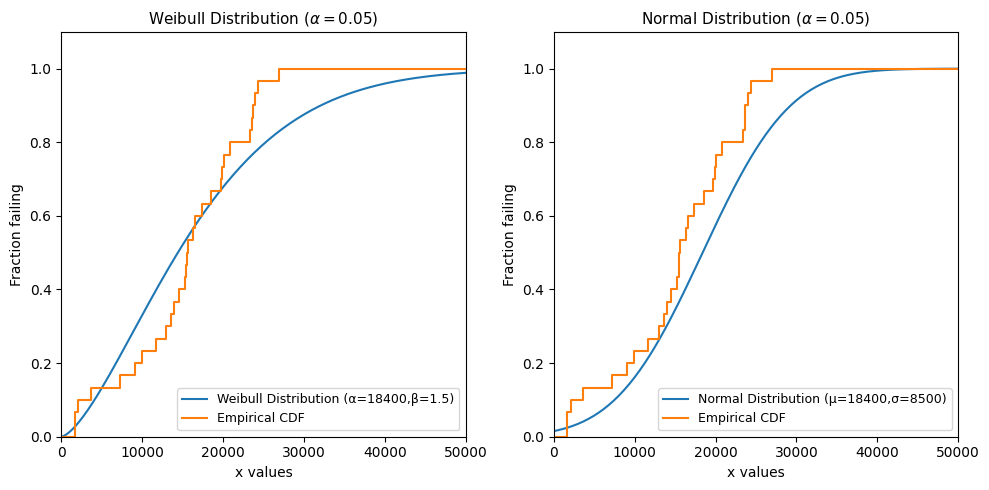

In [34]:
data = [1643,1664,2083,3625,7230,9095,9968,11689,12989,13622,13953,14527,15263,15428,15503,15629,16342,16584,17374,18571,19739,19936,20102,20832,23378,23612,23678,23971,24341,26964]

from reliability.Distributions import Weibull_Distribution
from reliability.Distributions import Normal_Distribution

sig_level = 0.05
dist1 = Weibull_Distribution(alpha = 18_400, beta= 1.5)
dist2 = Normal_Distribution(mu = 18_400, sigma= 8500)

plt.figure(figsize=(10, 5))

plt.subplot(121)
KStest(distribution=dist1, data=data, significance=sig_level)
plt.title(rf'Weibull Distribution ($\alpha={sig_level}$)', fontsize=11)
plt.legend(loc='lower right', fontsize=9)
plt.xlim(0, 50000)

plt.subplot(122)
KStest(distribution=dist2, data=data, significance=sig_level)
plt.title(rf'Normal Distribution ($\alpha={sig_level}$)', fontsize=11)
plt.legend(loc='lower right', fontsize=9)
plt.xlim(0, 50000)

plt.tight_layout()
plt.show()

## References
1- <a href="https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test">Wiki</a><br>

2- <a href="https://reliability.readthedocs.io/en/latest/Kolmogorov-Smirnov%20test.html">Reliability Package Documentation</a><br>

3- <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html">Scipy Package Documentation</a><br>

4- <a href="https://www.amazon.com/Reliability-Engineering-Risk-Analysis-Practical/dp/1498745873/ref=sr_1_1?crid=1L3C7SCG762MC&dib=eyJ2IjoiMSJ9.TDyisGMm3SXBcpeA-tLUeQ.2b8MfQwjQ2KQ_289ZWx0PYIqoLjSVvlQy6bDweSUu34&dib_tag=se&keywords=Reliability+Engineering+and+Risk+Analysis%3A+A+practical+Guide%2C+Third+Edition+%282017%29%2C+by+M.+Modarres%2C+M.+Kaminskiy%2C+and+V.+Krivtsov&qid=1723139555&sprefix=reliability+engineering+and+risk+analysis+a+practical+guide%2C+third+edition+2017+%2C+by+m.+modarres%2C+m.+kaminskiy%2C+and+v.+krivtsov%2Caps%2C128&sr=8-1">Reliability Engineering and Risk Analysis: A practical Guide, Third Edition (2017), by M. Modarres, M. Kaminskiy, and V. Krivtsov.</a>